# Sentiment Analysis on Twitter Data

In [28]:
!pip install wordcloud


In [29]:
!pip install python-twitter


## Analyzing Twitter Data

In [30]:
import twitter
import sys
import re, string

api = twitter.Api(consumer_key='''Rc6km6pIfW1uNOVfZfUn52ygG''',
                  consumer_secret='''mjJAvHi2raDAHgrPcyby8eFslVWKaJFZnrRuV4xCiSEej4CKgu''',
                  access_token_key='''1363540660180180993-woDvPXH17YWHUkGfYpI0vR8B7wkHSD''',
                  access_token_secret='''6532gkxdW94rSSzxqcHIqQDbIrzBUAUKIKRtlspMaila3''',
                  sleep_on_rate_limit=True)

In [35]:
# This function will take in a search term and run through the twitter API to find
# the most recent tweets using that search term

def searchTerm(searchTerm):

    untilID = sys.maxsize
    ids = []
    processedResults = []
    results = []
    
    while len(processedResults)<100:
        results = getResults(searchTerm, untilID)
        for x in results:
            a = preProcess(x)
            if a != None:
                processedResults.append(a)
                ids.append(x.id)
                
        untilID = min(ids)
        print(processedResults) 
    return processedResults

In [57]:
# call API

def getResults(searchTerm, untilID):
    
    results = api.GetSearch(term=searchTerm, since="2021-09-01", until="2022-09-29", count="100",result_type="recent", max_id=untilID, lang="en")
        
    print(results)
    return results

In [58]:
# pre process twitter data

def preProcess(result):
    
    #make sure it's not a media post
    if result.retweeted_status == None and result.media == None:
        
        
       
        t = result.text
        t = t.replace("https://",'')
        t = t.replace("  ", " ")
        t = t.replace("\n", " ")
        t = t.replace("\t", " ")
        t = t.replace("  ", " ")
        
        # Deal with punctuation and turn to all lowercae within the tweets
        processedResult = t.lower().translate(str.maketrans("", "", string.punctuation)).split(" ")
        
    else:
        
        return None
        
    return processedResult

In [59]:


data = searchTerm('Burrow')



[Status(ID=1575273413836505088, ScreenName=JAdams_716, Created=Wed Sep 28 23:57:03 +0000 2022, Text="@tgriff1010 @AllBlueAllDay @MethVaper @McShay13 Many teams have great offensive weapons but can't make it to the pl… https://t.co/G99CHubAuB"), Status(ID=1575273397763940358, ScreenName=degen_betting, Created=Wed Sep 28 23:56:59 +0000 2022, Text='The last time Tua and Burrow played was electric. We can’t wait for them to run it back tomorrow night Degens! https://t.co/qAgjJquZGT'), Status(ID=1575273290331213824, ScreenName=Parker_Picks, Created=Wed Sep 28 23:56:34 +0000 2022, Text='I’m still part of TuAnon, but I don’t see them being undefeated this whole season. That being said, I think this is… https://t.co/cibk1hC9k0'), Status(ID=1575272909269913603, ScreenName=Pole_3, Created=Wed Sep 28 23:55:03 +0000 2022, Text='RT @AroundTheNFL: Dolphins coach Mike McDaniel on Bengals QB Joe Burrow: "Coming off the bus, I see swag"\n\nhttps://t.co/xwVmhQorOd https://…'), Status(ID=1575272553035485

[Status(ID=1575264133569716227, ScreenName=JrodTheGoat_, Created=Wed Sep 28 23:20:11 +0000 2022, Text='@Cincyalldey @andrewoates3 @UCBarstool @Bengals @NFL Dolphins blitz the most in the NFL. Burrow has zero protection… https://t.co/g4Lu88dFHT'), Status(ID=1575264018998099968, ScreenName=CardboardEchoes, Created=Wed Sep 28 23:19:43 +0000 2022, Text='RT @jeremynyr: QB Rookies\nHurts $3\nTLaw $6\nBurrow $7\nAdd $1 PWE or $4 BMWT \n@CardboardEchoes @sports_sell @ILOVECOLLECTIN1 @TheHobby247 htt…'), Status(ID=1575264001608540160, ScreenName=Safid_Deen, Created=Wed Sep 28 23:19:39 +0000 2022, Text="RT @usatodaysports: 'He’s one of the true young flag bearers of our league' Miami Dolphins coach Mike McDaniel praises the play of Bengals…"), Status(ID=1575263841516134400, ScreenName=TheHobby247, Created=Wed Sep 28 23:19:01 +0000 2022, Text='RT @jeremynyr: QB Rookies\nHurts $3\nTLaw $6\nBurrow $7\nAdd $1 PWE or $4 BMWT \n@CardboardEchoes @sports_sell @ILOVECOLLECTIN1 @TheHobby247 htt…'), Status

[Status(ID=1575253642747252774, ScreenName=TJtrav_, Created=Wed Sep 28 22:38:29 +0000 2022, Text='@elitetakes_ The way we put pressure on the bills we should have no problem attacking Joe Burrow'), Status(ID=1575253516846878720, ScreenName=RyanGeppi, Created=Wed Sep 28 22:37:59 +0000 2022, Text="RT @NFL: Tua and Burrow's last matchup was a movie 🎬\n\n@Tua | @JoeyB\n\n#MIAvsCIN -- Tomorrow 8:15pm ET on Prime Video\nAlso available on NFL+…"), Status(ID=1575253394540924931, ScreenName=601_DC, Created=Wed Sep 28 22:37:30 +0000 2022, Text="RT @NFL: Tua and Burrow's last matchup was a movie 🎬\n\n@Tua | @JoeyB\n\n#MIAvsCIN -- Tomorrow 8:15pm ET on Prime Video\nAlso available on NFL+…"), Status(ID=1575253359958827008, ScreenName=elitetakes_, Created=Wed Sep 28 22:37:22 +0000 2022, Text='I really wonder how the Fins defense plans to attack Joe Burrow\n\nYou can either keep spamming the cover 0 blitzes t… https://t.co/hCQ0iLJy3f'), Status(ID=1575253323883679754, ScreenName=AceValstrax, Created=W

In [60]:
# This function runs a rule-based sentiment analysis on a given entry

def analyzeSentiment(entry):
    
    # I set the score to zero, then loop through each word in the entry
    # At each word, add one to the score if it is in positive_words, subtract one if it is in negative_words
    
    score = 0
    print(entry)
    
    for word in entry:
        
        if word in positive_words:
            score = score + 1
        if word in negative_words:
            score = score - 1
    print(score)        
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"
        

In [61]:


sentiments = []

global negative_words
global positive_words

with open('negative-words-copy.txt') as f:
    negative_words = [word.strip() for word in f.readlines() if word[0] not in [';', '\n']]

with open('positive-words-copy.txt') as f:
    positive_words = [word.strip() for word in f.readlines() if word[0] not in [';', '\n']]

for entry in data:
    
    sentiments.append(analyzeSentiment(entry))


['tgriff1010', 'allblueallday', 'methvaper', 'mcshay13', 'many', 'teams', 'have', 'great', 'offensive', 'weapons', 'but', 'cant', 'make', 'it', 'to', 'the', 'pl…', 'tcog99chubaub']
0
['i’m', 'still', 'part', 'of', 'tuanon', 'but', 'i', 'don’t', 'see', 'them', 'being', 'undefeated', 'this', 'whole', 'season', 'that', 'being', 'said', 'i', 'think', 'this', 'is…', 'tcocibk1hc9k0']
0
['justinjettas', 'i’m', 'not', 'sure', 'if', 'they', 'fixed', 'it', 'in', 'the', 'recent', 'patch', 'but', 'teams', 'not', 'resigning', 'young', 'fas', 'like', 'burrowherbe…', 'tcoebgjzlnulb']
1
['nfl', 'week4', 'nfltwitter', 'tua', 'amp', 'tyreeks', 'dolphins', 'vs', 'burrow', 'amp', 'chase’s', 'bengals', 'waddle', '75', 'rec', 'yrds', '', 'ja’marr', 'chase…', 'tcoullikvwc1u']
0
['peanutlive', 'coachkamc', 'sorry', 'i', 'have', 'to', 'the', 'bengals', 'fan', 'to', 'say', 'this', 'but', 'if', 'it', 'wasnt', 'for', 'the', 'dolphins', 'and', 'fitz', 'mag…', 'tcooudrf4z35p']
-1
['thegiantswire', 'no', 'one', 'can

In [62]:
print(sentiments)


['Neutral', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutr


### Visualizing the Results
I created a few simple charts to look at the overall sentiment of the current Twitter search.

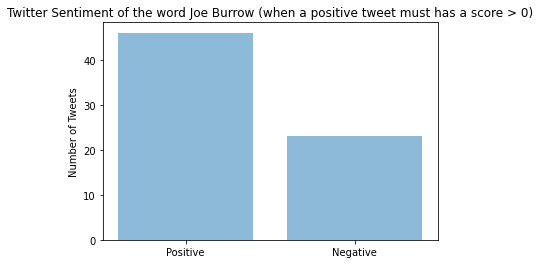

In [63]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
objects = ('Positive', 'Negative')
y_pos = np.arange(len(objects))
positive = sum([1 for x in sentiments if x == 'Positive'])
negative = sum([1 for x in sentiments if x == 'Negative'])
performance = [positive, negative]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Tweets')
plt.title('Twitter Sentiment of the word Joe Burrow (when a positive tweet must has a score > 0)')

plt.show()

### wordcloud module visualization

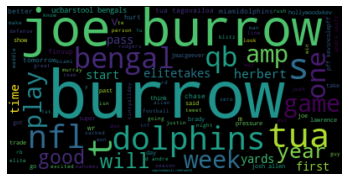

In [64]:
from wordcloud import WordCloud
import os

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
overallWords = ' '
for entry in data:
    for word in entry:
        overallWords += word + ' '

wordcloud = WordCloud().generate(overallWords)


plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()